# one-sample t-test

What: Test whether a population mean equals a target value
How: Uses the t statistic comparing the sample mean to mu_0 with the sample SD and size. Assumes normality (or large n by CLT)
When: have one numeric sample and a reference mean


One-sample t-test
 t = 0.085, df = 31, p = 0.9328
Sample mean = 20.09, Target = 20.00
Conclusion: Fail to reject H0; data are consistent with mean mpg = 20.


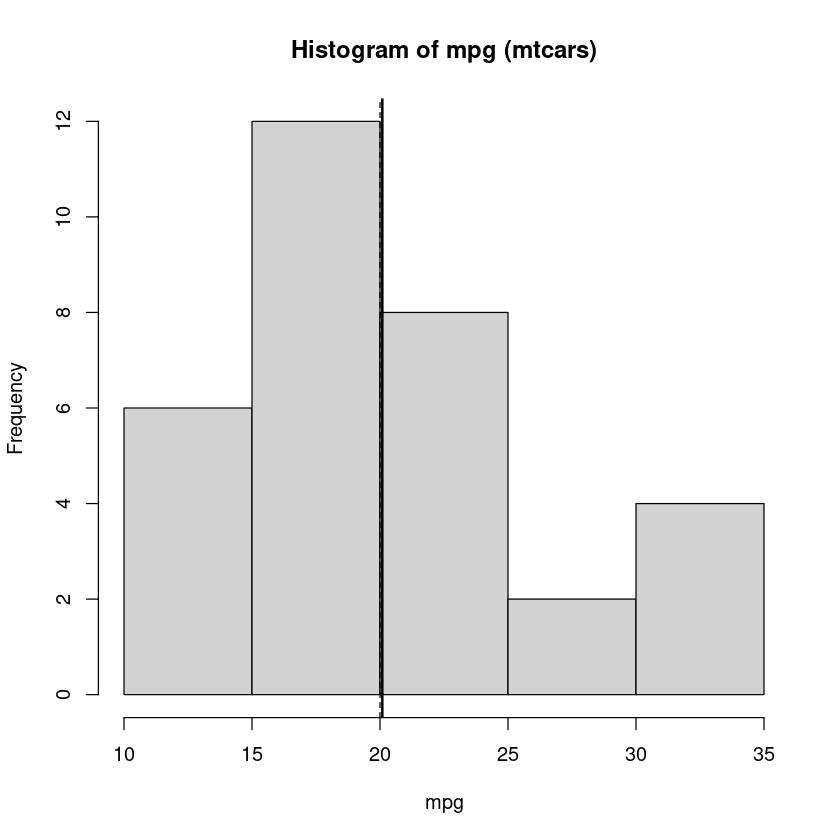

In [ ]:
# one-sample t-test: is the average mpg of mtcars equal to 20?
data(mtcars)
alpha = 0.05
target_mean = 20
x = mtcars$mpg

hist(x, main="Histogram of mpg (mtcars)", xlab="mpg")
abline(v=mean(x), lwd=2)
absline(v=target_mean, lty=2)

res = t.test(x, mu = target_mean)  # two-sided by default
cat(sprintf("\nOne-sample t-test\n t = %.3f, df = %.0f, p = %.4f\nSample mean = %.2f, Target = %.2f\n",
            res$statistic, res$parameter, res$p.value, mean(x), target_mean))

# Interpretation & conclusion
# If p < alpha, we reject H0: mean = 20 (there is evidence mean != 20).
if (res$p.value < alpha) {
  cat("Conclusion: Reject H0 at 5% level; mean mpg differs from 20.\n")
} else {
  cat("Conclusion: Fail to reject H0; data are consistent with mean mpg = 20.\n")
}


In [10]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,am_f
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Manual
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Manual
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Manual
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Automatic
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Automatic
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,Automatic


# two-sample (Welch) t-test

What: Compare means of two independent groups with unequal variances allowed.
How: Welch’s t uses group means, SDs, and sizes with Welch–Satterthwaite df.
When: Two unrelated groups, approximately normal data (or large n)


Welch Two-sample t-test
 t = -3.767, df ≈ 18.3, p = 0.0014
Means: Automatic=17.15, Manual=24.39
reject H0; mean mpg differs between transmissions.


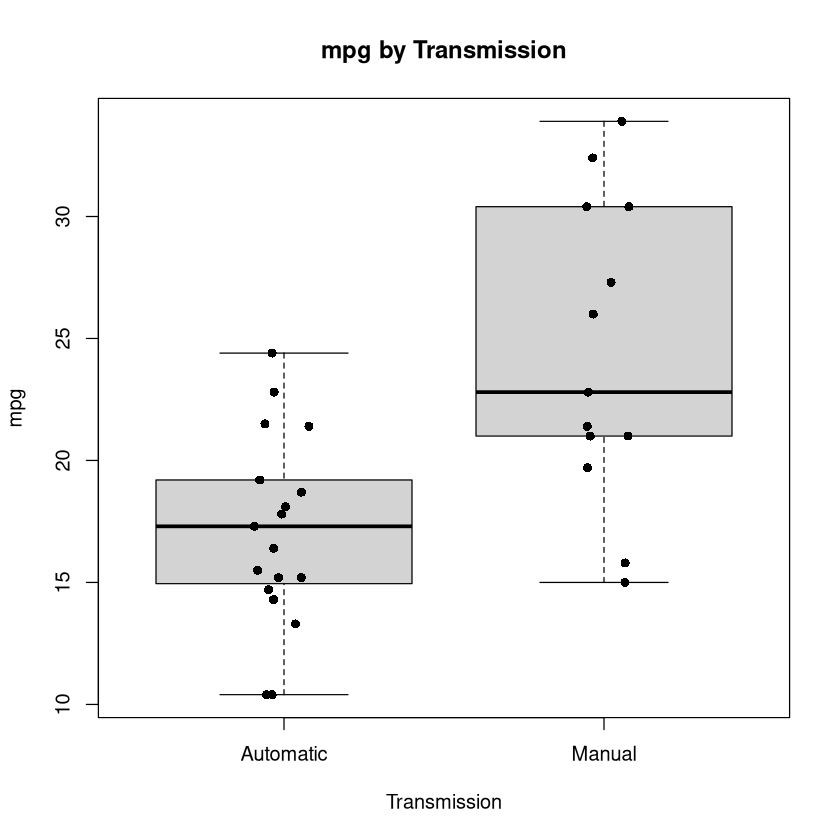

In [6]:
# two-sample Welch t-test: mpg by transmission (am: 0 = auto, 1 = manual)
alpha = 0.05
mtcars$am_f = factor(mtcars$am, labels = c("Automatic","Manual"))

boxplot(mpg ~ am_f, data = mtcars, main="mpg by Transmission", xlab="Transmission", ylab="mpg")
stripchart(mpg ~ am_f, data=mtcars, method="jitter", vertical=TRUE, pch=16, add=TRUE)

res = t.test(mpg ~ am_f, data = mtcars)  # Welch by default
cat(sprintf("\nWelch Two-sample t-test\n t = %.3f, df ≈ %.1f, p = %.4f\nMeans: Automatic=%.2f, Manual=%.2f\n",
            res$statistic, res$parameter, res$p.value,
            mean(mtcars$mpg[mtcars$am_f=="Automatic"]),
            mean(mtcars$mpg[mtcars$am_f=="Manual"])))

# Conclusion
if (res$p.value < alpha) {
  cat("reject H0; mean mpg differs between transmissions.\n")
} else {
  cat("fail to reject H0; no clear mean mpg difference.\n")
}

# paired t-test

What: Compare means of two paired conditions on the same units
How: Compute differences and test whether their mean is zero (t on paired differences)
When: Before/after or matched pairs


Paired t-test
 t = -4.062, df = 9, p = 0.0028
Mean diff (g1 - g2) = -1.58
Conclusion: Reject H0; mean paired difference is not zero.


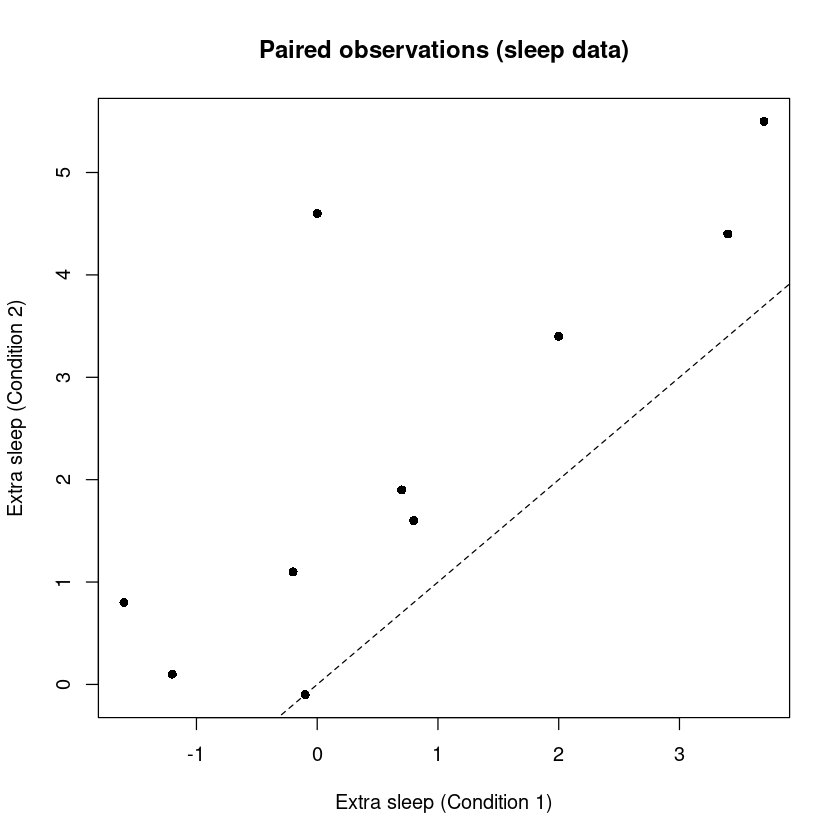

In [2]:
# paired t-test: classic 'sleep' data (increase in sleep under two conditions) 
data(sleep)
alpha = 0.05

# reshape to pairs by subject ID
d1 = subset(sleep, group == 1, select = c(ID, extra))
d2 = subset(sleep, group == 2, select = c(ID, extra))
m  = merge(d1, d2, by = "ID", suffixes = c("_g1","_g2"))

plot(m$extra_g1, m$extra_g2, pch=16,
     xlab="Extra sleep (Condition 1)", ylab="Extra sleep (Condition 2)",
     main="Paired observations (sleep data)")
abline(0,1, lty=2)

res = t.test(m$extra_g1, m$extra_g2, paired = TRUE)
cat(sprintf("\nPaired t-test\n t = %.3f, df = %.0f, p = %.4f\nMean diff (g1 - g2) = %.2f\n",
            res$statistic, res$parameter, res$p.value, mean(m$extra_g1 - m$extra_g2)))


if (res$p.value < alpha) {
  cat("Conclusion: Reject H0; mean paired difference is not zero.\n")
} else {
  cat("Conclusion: Fail to reject H0; no clear paired mean difference.\n")
}

# one-way ANOVA

What: Test if any group mean differs among ≥3 groups.
How: Compares between-group to within-group variability (F statistic).
When: ≥3 independent groups, approximately normal with similar variances.

one-way ANOVA
 F = 34.702, p = 0.000000
reject H0; at least one spray has a different mean count.


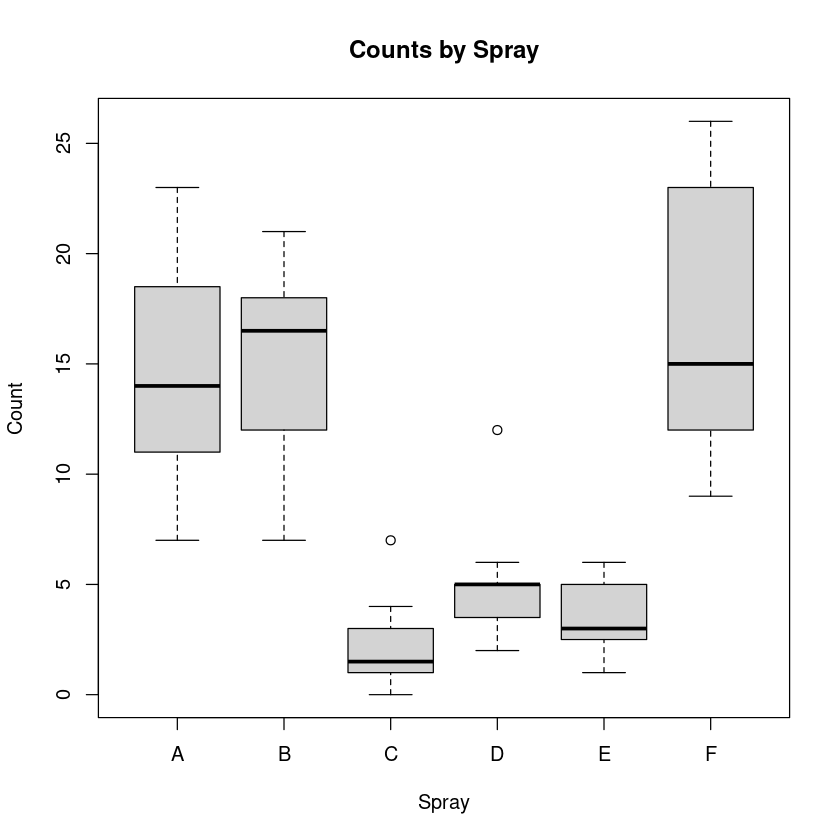

In [2]:
# one-way ANOVA: InsectSprays (count by spray type)
data(InsectSprays)
alpha = 0.05

boxplot(count ~ spray, data=InsectSprays, main="Counts by Spray", xlab="Spray", ylab="Count")

fit = aov(count ~ spray, data = InsectSprays)
sm  = summary(fit)
Fval = sm[[1]]$`F value`[1]; pval = sm[[1]]$`Pr(>F)`[1]
cat(sprintf("one-way ANOVA\n F = %.3f, p = %.6f\n", Fval, pval))


if (pval < alpha) {
  cat("reject H0; at least one spray has a different mean count.\n")
} else {
  cat("fail to reject H0; means appear similar across sprays.\n")
}

# Kruskal–Wallis test (nonparametric ANOVA)

What: Rank-based alternative to one-way ANOVA without normality assumption
How: Compares mean ranks between groups (H statistic)
When: >=3 independent groups, skewed/ordinal data or unequal variances


Kruskal Wallis test
 H = 54.691, df = 5, p = 0.000000
reject H0; distributions differ across sprays

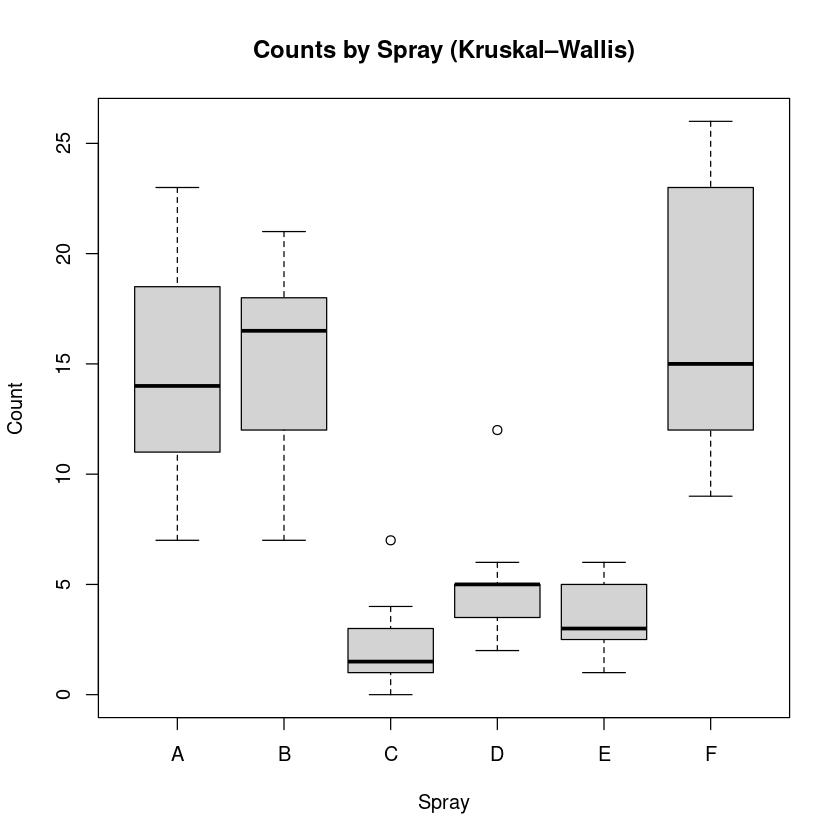

In [3]:
# Kruskal–Wallis: same InsectSprays (robust to non-normality) 
alpha = 0.05

boxplot(count ~ spray, data=InsectSprays, main="Counts by Spray (Kruskal–Wallis)", xlab="Spray", ylab="Count")

res = kruskal.test(count ~ spray, data = InsectSprays)
cat(sprintf("\nKruskal Wallis test\n H = %.3f, df = %.0f, p = %.6f\n",
            res$statistic, res$parameter, res$p.value))

# Conclusion
if (res$p.value < alpha) {
  cat("reject H0; distributions differ across sprays")
} else {
  cat("fail to reject H0; distributions look similar")
}


In [11]:
mtcars$am

[1] 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1

# chi-square test of independence

What: Test whether two categorical variables are associated
How: Compares observed counts to expected counts under independence (chisqr)
When: Contingency tables with expected counts reasonably large

         Transmission
Cylinders Auto Manual
        4    3      8
        6    4      3
        8   12      2


Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



Chi-square test of independence
 X^2 = 8.741, df = 2, p = 0.0126
reject H0; cylinders and transmission are associated

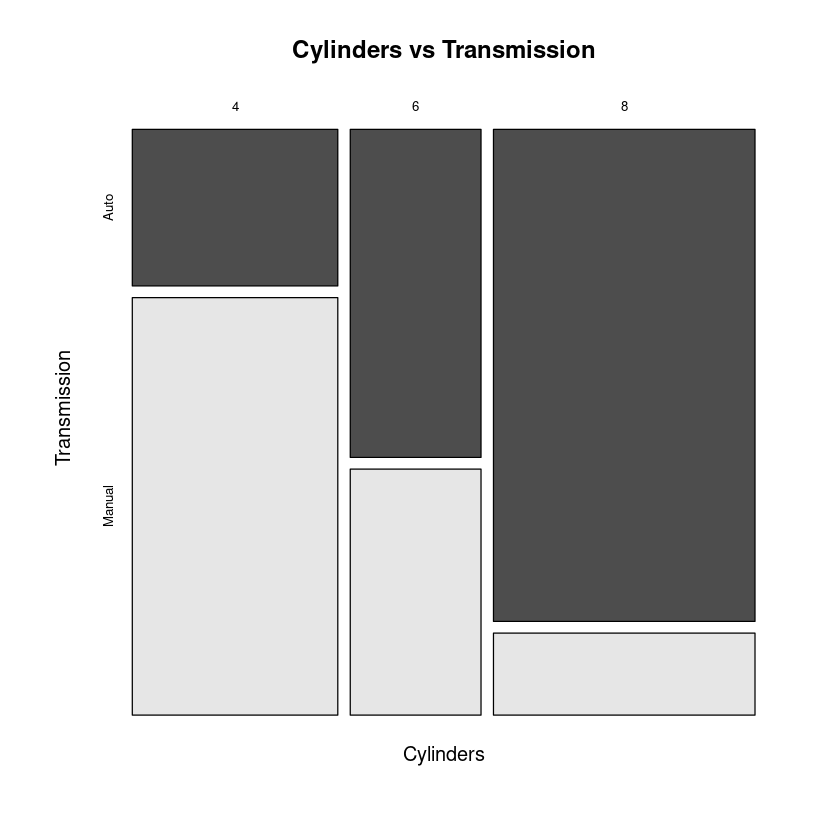

In [4]:
# chi-square independence: cylinders vs transmission
alpha = 0.05
tab = table(Cylinders = factor(mtcars$cyl), Transmission = factor(mtcars$am, labels=c("Auto","Manual")))
print(tab)

mosaicplot(tab, main="Cylinders vs Transmission", color=TRUE)

res = chisq.test(tab)
cat(sprintf("\nChi-square test of independence\n X^2 = %.3f, df = %.0f, p = %.4f\n",
            res$statistic, res$parameter, res$p.value))


if (res$p.value < alpha) {
  cat("reject H0; cylinders and transmission are associated")
} else {
  cat("fail to reject H0; no clear association detected")
}


# fisher’s exact test (2×2)

What: Exact test of independence for a 2×2 table (works with small counts).
How: Computes exact probability of tables as extreme or more under H0.
When: 2×2 tables, especially with small samples or small expected counts.

           Transmission
EngineShape Auto Manual
   V-shaped   12      6
   Straight    7      7
Fisher's Exact Test
 Odds ratio = 1.956, p = 0.4727
fail to reject H0; no clear association

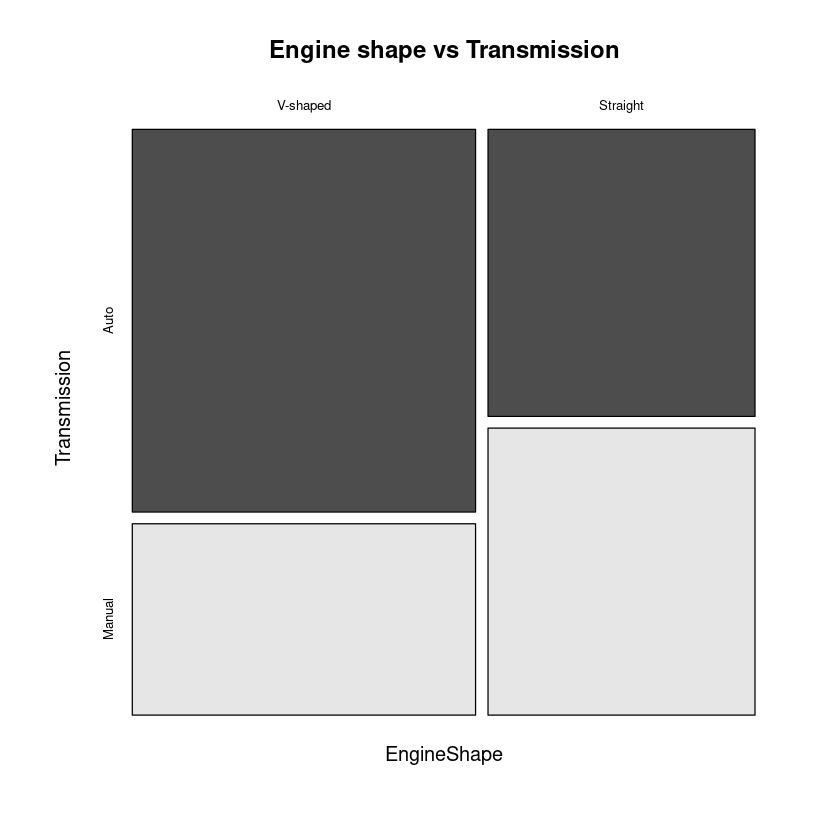

In [6]:
# Fisher's exact test: engine shape (vs) vs transmission (am)
data(mtcars)
alpha = 0.05
tab = table(EngineShape = factor(mtcars$vs, labels=c("V-shaped","Straight")),
             Transmission = factor(mtcars$am, labels=c("Auto","Manual")))
print(tab)

mosaicplot(tab, main="Engine shape vs Transmission", color=TRUE)

res = fisher.test(tab)
cat(sprintf("Fisher's Exact Test\n Odds ratio = %.3f, p = %.4f\n", res$estimate, res$p.value))


if (res$p.value < alpha) {
  cat("reject H0; evidence of association between engine shape and transmission")
} else {
  cat("fail to reject H0; no clear association")
}

# shapiro–Wilk normality test

What: Test if data plausibly come from a normal distribution
How: Correlates ordered data with expected normal order statistics (W)
When: You need to check normality assumption for small/medium n


Shapiro-Wilk normality test
 W = 0.948, p = 0.1229
Conclusion: Fail to reject H0; normality is plausible for mpg.


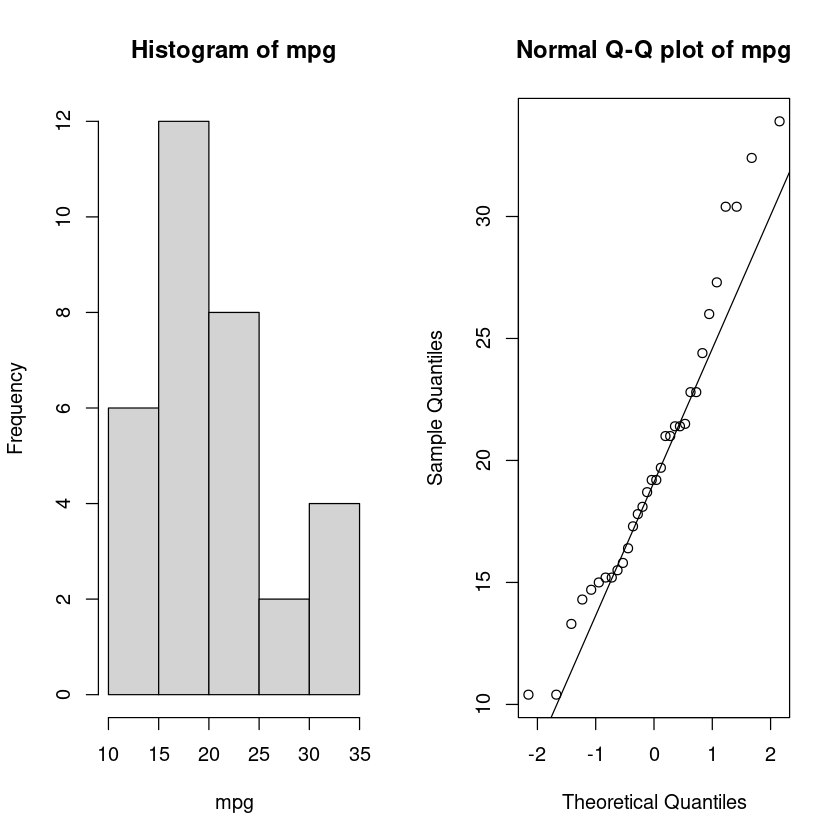

In [8]:
#shapiro–Wilk: normality of mpg
alpha = 0.05
x = mtcars$mpg

par(mfrow=c(1,2))
hist(x, main="Histogram of mpg", xlab="mpg")
qqnorm(x, main="Normal Q-Q plot of mpg"); qqline(x)
par(mfrow=c(1,1))

res = shapiro.test(x)
cat(sprintf("\nShapiro-Wilk normality test\n W = %.3f, p = %.4f\n", res$statistic, res$p.value))

if (res$p.value < alpha) {
  cat("Conclusion: Reject H0; mpg not normally distributed at 5% level.\n")
} else {
  cat("Conclusion: Fail to reject H0; normality is plausible for mpg.\n")
}


# wilcoxon rank-sum test (Mann–Whitney)

What: Nonparametric test comparing two independent groups’ locations (medians)
How: Uses ranks across both groups; tests for shift in distributions
when: Two groups, not comfortable assuming normality, or with outliers


Wilcoxon rank-sum test
 W = 42.0, p = 0.0019
reject H0; distributions (medians) differ between transmissions

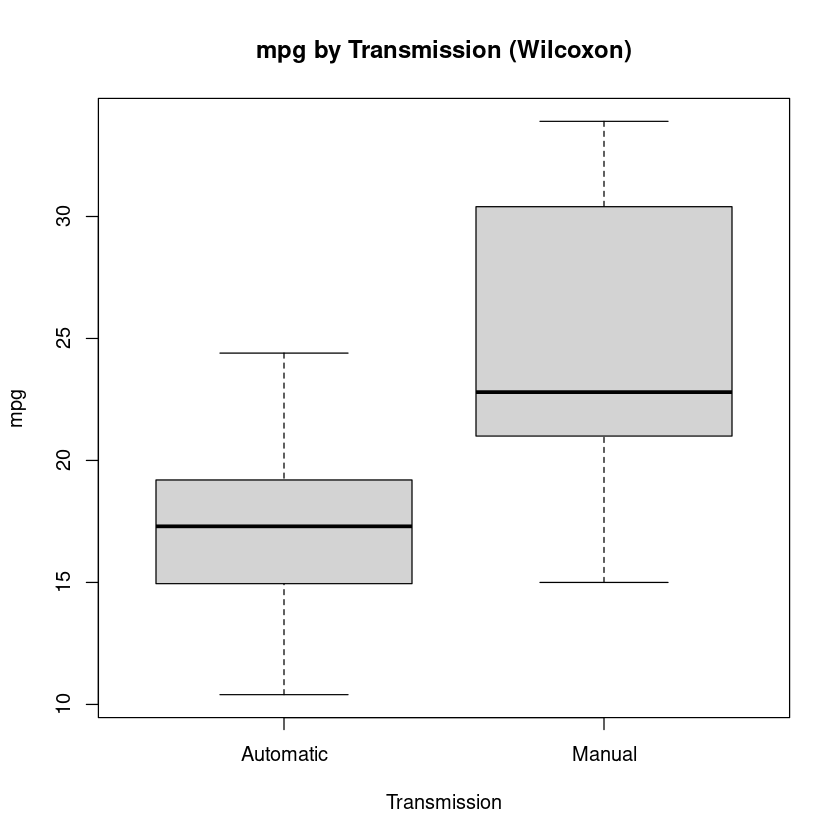

In [9]:
# wilcoxon rank-sum: mpg by transmission (robust alternative to t-test)
alpha = 0.05
mtcars$am_f = factor(mtcars$am, labels = c("Automatic","Manual"))

boxplot(mpg ~ am_f, data=mtcars, main="mpg by Transmission (Wilcoxon)", xlab="Transmission", ylab="mpg")

res = wilcox.test(mpg ~ am_f, data=mtcars, exact=FALSE)
cat(sprintf("\nWilcoxon rank-sum test\n W = %.1f, p = %.4f\n", res$statistic, res$p.value))

if (res$p.value < alpha) {
  cat("reject H0; distributions (medians) differ between transmissions")
} else {
  cat("fail to reject H0; no clear difference in location")
}



# correlation test (Pearson)

What: test whether two numeric variables have nonzero linear correlation
How: computes Pearson’s r and tests H0: p = 0 with a t statistic
When: two quantitative variables where a linear relationship is plausible

## alpha = 0.05
x = mtcars$hp
y = mtcars$mpg

plot(x, y, pch=16, xlab="Horsepower (hp)", ylab="Miles per gallon (mpg)",
     main="mpg vs hp with fitted line")
abline(lm(y ~ x), lwd=2)

res = cor.test(x, y, method = "pearson")
cat(sprintf("\nPearson correlation test\n r = %.3f, t = %.3f, df = %.0f, p = %.6f\n",
            res$estimate, res$statistic, res$parameter, res$p.value))

# Conclusion
if (res$p.value < alpha) {
  cat("reject H0; evidence of linear association between hp and mpg.\n")
} else {
  cat("fail to reject H0; no clear linear association.\n")
}